In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from dotenv import load_dotenv

In [13]:
# Get paths from environment variables
data_dir = os.getenv('DATA_DIR')

# Read the data files
city_df = pd.read_csv(os.path.join(data_dir, 'City_energy_profiles.csv'))
county_df = pd.read_csv(os.path.join(data_dir, 'County_energy_profiles.csv'))

TypeError: expected str, bytes or os.PathLike object, not NoneType

In [14]:
# 1. Basic Statistical Analysis
def print_basic_stats(df, dataset_name):
    print(f"\n{dataset_name} Dataset Statistics:")
    print(f"Number of records: {len(df)}")
    print("\nNumerical Columns Summary:")
    print(df.describe())
    
    # Check for missing values
    missing = df.isnull().sum()
    if missing.any():
        print("\nMissing Values:")
        print(missing[missing > 0])

# Run analyses
print_basic_stats(city_df, "City")
print_basic_stats(county_df, "County")


City Dataset Statistics:
Number of records: 273

Numerical Columns Summary:
         latitude   longitude     population  doe_climate_zone  \
count  271.000000  271.000000     271.000000        271.000000   
mean    39.167552 -105.259151   14613.468635          5.354244   
std      1.054287    1.665428   57254.776938          0.798129   
min     37.015493 -109.008590       7.000000          4.000000   
25%     38.226835 -106.146252     445.000000          5.000000   
50%     39.361015 -105.056711    1227.000000          5.000000   
75%     40.045075 -104.370990    6025.500000          6.000000   
max     40.984988 -102.124589  663303.000000          7.000000   

       Residential Electricity  consumption (MWh)  \
count                                2.730000e+02   
mean                                 5.111343e+04   
std                                  2.004013e+05   
min                                  6.357699e+01   
25%                                  1.349853e+03   
50%       

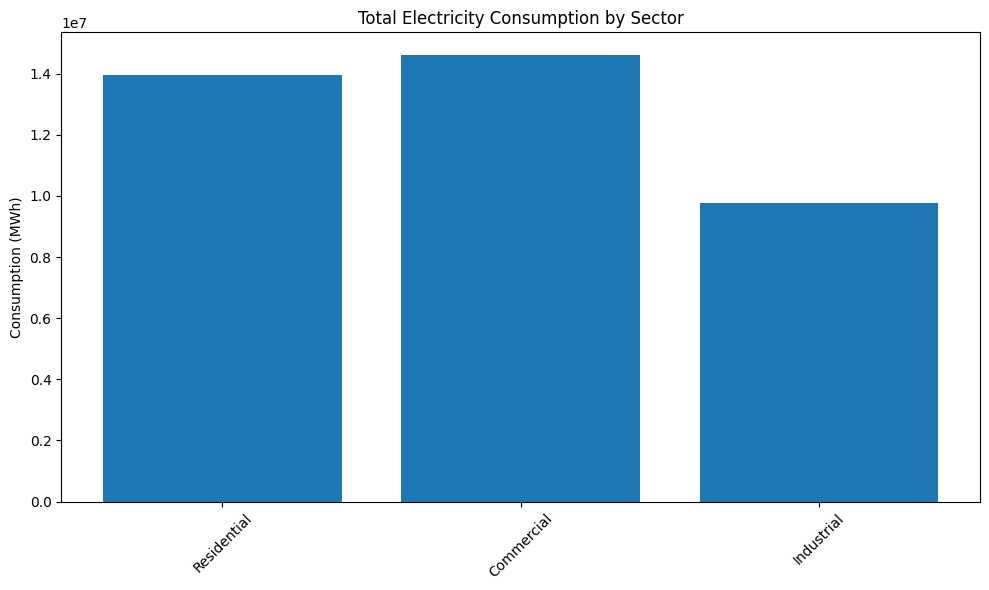

In [17]:
# 2. Energy Consumption Analysis
def analyze_energy_consumption(df):
    # Calculate total consumption by sector
    sectors = {
        'Residential': df['Residential Electricity  consumption (MWh)'].sum(),
        'Commercial': df['Commercial Electricity  consumption (MWh)'].sum(),
        'Industrial': df['Industry Electricity  consumption (MWh)'].sum()
    }
    
    # Create bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(sectors.keys(), sectors.values())
    plt.title('Total Electricity Consumption by Sector')
    plt.ylabel('Consumption (MWh)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    # plt.savefig('data/sector_consumption.png')
    plt.show()


analyze_energy_consumption(city_df)

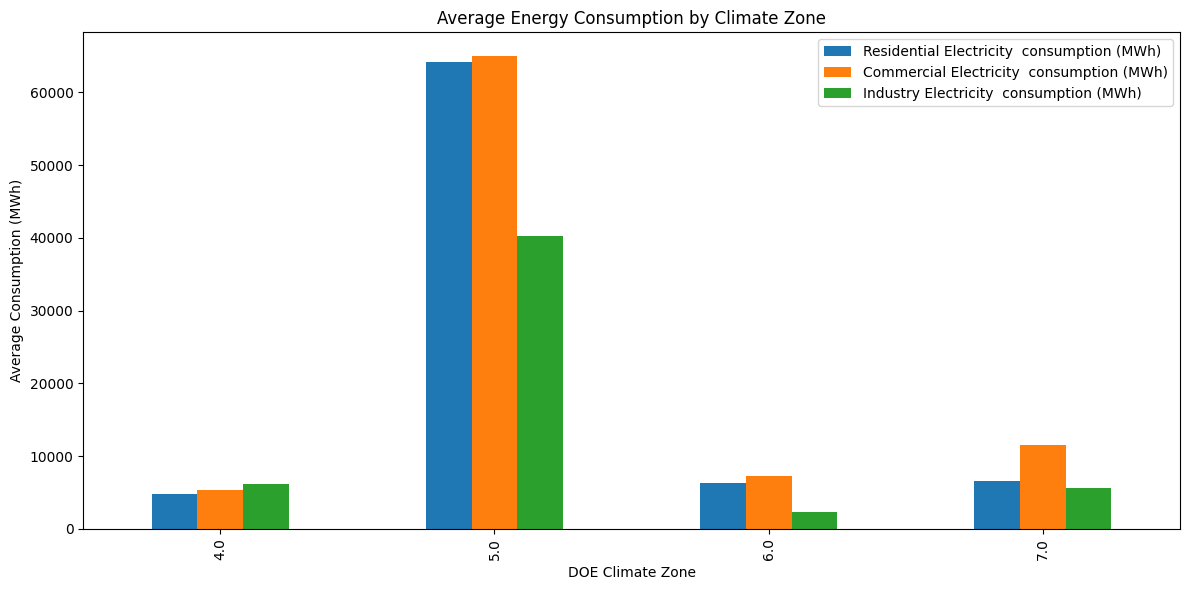

In [19]:
def analyze_climate_zones(df):
    # Average consumption by climate zone using a list of columns
    columns_to_analyze = [
        'Residential Electricity  consumption (MWh)',
        'Commercial Electricity  consumption (MWh)',
        'Industry Electricity  consumption (MWh)'
    ]
    
    climate_analysis = df.groupby('doe_climate_zone')[columns_to_analyze].mean()
    
    # Create plot
    climate_analysis.plot(kind='bar', figsize=(12, 6))
    plt.title('Average Energy Consumption by Climate Zone')
    plt.ylabel('Average Consumption (MWh)')
    plt.xlabel('DOE Climate Zone')
    plt.tight_layout()
    # plt.savefig('../data/climate_zone_analysis.png')
    plt.show()

# Run the analysis
analyze_climate_zones(city_df)